In [14]:
from metadata import SymbolStorage

ss = SymbolStorage()
df = ss.get_dataframe()
df.matter.unique()


array(['P-Process', 'L-Piping', 'H-HVAC', 'T-telecom', 'N-Structural',
       'R-Mechanical', 'E-Electro', 'J-Instrument', 'S-Safety'],
      dtype=object)

In [13]:
df[df.matter.isin(['L-Piping'])]

,name,family,description,matter
13,STLB001,Elbows&Tees,ELBOW BUTT WELD,L-Piping
14,STLB002,Elbows&Tees,ELBOW BUTT WELD,L-Piping
15,STLB003,Elbows&Tees,ELBOW 45 BUTT WELD,L-Piping
16,STLB004,Elbows&Tees,TEE BUTT WELD,L-Piping
17,STLB005,Elbows&Tees,ELBOW SCREWED,L-Piping
...,...,...,...,...
110,STLZ013,Miscellaneous,PLATFORM GRID REFERENCE,L-Piping
111,STLZ014,Miscellaneous,INSTRUMENT,L-Piping
112,STLZ015,Miscellaneous,SPEC CHANGE,L-Piping
113,STLZ016,Miscellaneous,INSULATED LINE,L-Piping


In [20]:
my_map = df.name.to_dict()
inv_map = {v: k for k, v in my_map.items()}
inv_map

{'STPL001': 0,
 'STPL002': 1,
 'STPL004': 2,
 'STPL005': 3,
 'STPL024': 4,
 'STPL025': 5,
 'STPL026': 6,
 'STPL027': 7,
 'STPL010': 8,
 'STPL012': 9,
 'STPL013': 10,
 'STPL014': 11,
 'STPL015': 12,
 'STLB001': 13,
 'STLB002': 14,
 'STLB003': 15,
 'STLB004': 16,
 'STLB005': 17,
 'STLB006': 18,
 'STLB007': 19,
 'STLB008': 20,
 'STLB009': 21,
 'STLB010': 22,
 'STLB011': 23,
 'STLB012': 24,
 'STLF001': 25,
 'STLF003': 26,
 'STLF004': 27,
 'STLF005': 28,
 'STLF006': 29,
 'STLF007': 30,
 'STLF009': 31,
 'STLF010': 32,
 'STLF011': 33,
 'STLF012': 34,
 'STLT001': 35,
 'STLT002': 36,
 'STLT003': 37,
 'STLT004': 38,
 'STLT005': 39,
 'STLT006': 40,
 'STLT007': 41,
 'STLT008': 42,
 'STLT009': 43,
 'STLO001': 44,
 'STLO002': 45,
 'STLO003': 46,
 'STLO004': 47,
 'STLO005': 48,
 'STLA001': 49,
 'STLA002': 50,
 'STLA003': 51,
 'STLR001': 52,
 'STLR002': 53,
 'STLR003': 54,
 'STLR004': 55,
 'STLR005': 56,
 'STLR006': 57,
 'STLS001': 58,
 'STLS002': 59,
 'STLS003': 60,
 'STLS004': 61,
 'STLS006': 62,
 '

NameError: name 'pd' is not defined

In [7]:
df[df.name=='STPV011']

,name,family,description,matter
472,STPV011,Process Valves cont.,VACUUM RELEASE VALVE,P-Process


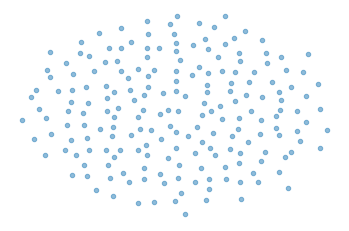

In [33]:
from fa2 import ForceAtlas2
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,
                        # Performance
                        jitterTolerance=0.1,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED
                        # Tuning
                        scalingRatio=2.0,
                        strongGravityMode=False,
                        gravity=0.5,
                        # Log
                        verbose=False)
G = np.identity(200)
positions = forceatlas2.forceatlas2(G, pos=None, iterations=50)
# To plot the graph
networkx_graph = nx.from_numpy_matrix(G)
nx.draw_networkx(networkx_graph, positions, node_size=20, with_labels=False, alpha=0.5)
plt.axis('off')
plt.show()

In [34]:
#[np.max(positions),np.min(positions)]
x,y = zip(*positions)
x_range = (np.max(x)-min(x))
y_range = (np.max(y)-min(y))
dx,dy = (5000-100,3500-100)
print(x_range, y_range)
x_ratio = dx/x_range
y_ratio = dy/y_range
x = (np.array(x)+np.abs(min(x))) * x_ratio + 50
y = (np.array(y)+np.abs(min(y))) * y_ratio + 50
max(x),min(x),max(y),min(y)
positions = list(zip(x,y))
positions[:10]

147.99810163430135 151.26978755260114


[(1580.9104904426763, 1863.6744647163557),
 (917.2815814074524, 1068.8240197144937),
 (2161.558139660314, 251.0330769435588),
 (4835.077585338726, 1192.2780968040422),
 (3023.3852392128847, 2267.6103833157763),
 (1506.4715365190057, 358.25252419809243),
 (2933.9708369209748, 1747.6000210753361),
 (3849.323035593003, 602.494173042498),
 (1639.7323545779727, 2905.0319749029886),
 (2076.510931268512, 3145.18694812653)]